# *KNN classification Lab*


# By Alex Dance

https://www.linkedin.com/in/alex-dance/

# Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.cluster import KMeans 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [19]:
#breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'

In [20]:
# from https://www.geeksforgeeks.org/ml-kaggle-breast-cancer-wisconsin-diagnosis-using-knn/
#https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/
##https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python

In [21]:
df = pd.read_csv('C:/Users/alexd/Alex Folder 1/Module 5/breast-cancer-wisconsin-data.csv')

In [22]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
mapping = {'M':1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(mapping)

In [24]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [25]:
import seaborn as sns

### EDA 


In [26]:
# Already completed in earlier labs
df = df.drop(['Unnamed: 32'], axis = 1)


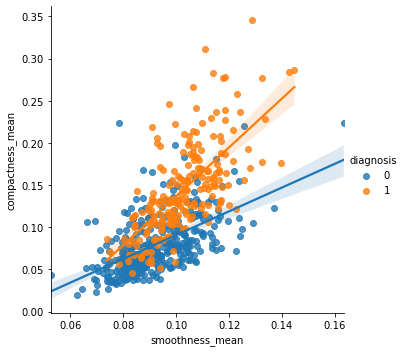

In [27]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',  data = df, hue = 'diagnosis') 

In [28]:
# ANSWER
# M and D are the 2 classes

In [29]:
# ANSWER

df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
#  there were 357 and 212  and choosing at randomly 357 / (357 + 212) = 62%

In [31]:
# ANSWER
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

In [32]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn= KNeighborsClassifier(n_neighbors =1)
# fit on the unstandardized data:
# see below

In [ ]:
print(knn)

In [ ]:
# see below

In [33]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [36]:
# STEP 3: test the model on the testing set, and check the accuracy
accuracy = knn.score(X_test,y_test)
y_pred = knn.predict(X_test)

In [57]:
print(accuracy)
# therefore 86% of the predictions are accurate
# in the original there were 357 and 212  and choosing at randomly 357 / (357 + 212) = 62%
# therefore knn is better than baseline

0.8596491228070176


In [37]:
print(y_pred)

[0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0]


In [60]:
#XTestproba = knn.predict_proba(X_test)

 Evaluating the test accuracy of a KNN where K == number of rows in the training data.

In [61]:
X_train.shape

(455, 31)

In [40]:

kmeanModel = KMeans(n_clusters=len(X_train))#.fit(X) 
# Fit Train Data
kmeanModel.fit(X_train)  
# Print accuracy_score
accuracy_score(y_test, y_pred, normalize=False)  #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

98

def calcscore (test, pred):
    acc_score = accuracy_score(test, pred, normalize=False) 
return acc_score
    

In [42]:
X_train.shape[0]

455

In [43]:
TotScoreK = []
TotScoreScore = []

In [46]:
#for k in range(1,3,1):
for k in range(1,X_train.shape[0],1):
    knn= KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test,y_test)
    y_pred = knn.predict(X_test)
    kmeanModel = KMeans(n_clusters=len(X_train))
    kmeanModel.fit(X_train)  
    acc_score = accuracy_score(y_test, y_pred, normalize=False)
    TotScoreK.append(k)
    TotScoreScore.append(acc_score)

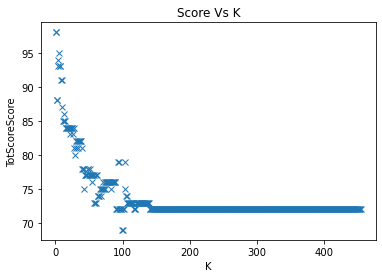

In [47]:
plt.plot(TotScoreK, TotScoreScore, 'x') 
plt.xlabel('K') 
plt.ylabel('TotScoreScore') 
plt.title('Score Vs K') 
plt.show()

# Fitting KNN across different values of K and plotting the mean cross-validated accuracy with 5 folds.


In [48]:
# ANSWER
from sklearn.model_selection import cross_val_score
print(cross_val_score(kmeanModel, X, y, cv=5))
# Ask Nas

[-4.99351174e+13 -2.60506402e+15 -4.06683606e+12 -2.14526446e+14
 -7.67604279e+12]


In [54]:
K_forCV = []
CV_a = []
for k in range(1,X_train.shape[0],1):
    knn= KNeighborsClassifier(n_neighbors =k)
    cvsvore = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    K_forCV.append(k)
    CV_a.append(cvsvore)


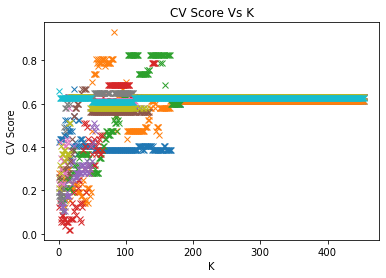

In [55]:
plt.plot(K_forCV, CV_a, 'x') 
plt.xlabel('K') 
plt.ylabel('CV Score') 
plt.title('CV Score Vs K') 
plt.show()

# Standardizing the predictor matrix and cross-validate across the different K.


In [ ]:

# Standarize X
Use Scaler and then replicate everythong

In [62]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [63]:
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [64]:
print(selector)

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='scale', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=5, step=1, verbose=0)


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

In [ ]:
by Alex Dance